In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv(r"C:\Users\amank\DMML CW\IBM.csv")
df.dataframeName = 'IBM.csv'
nRow, nCol = df.shape
print(f'{nRow} rows and {nCol} columns')

df.drop('EmployeeCount',axis =1,inplace=True)
df.drop('StandardHours',axis =1,inplace=True)
df.drop('Over18',axis =1,inplace=True)
df.drop('PerformanceRating',axis =1,inplace=True)
df.drop('EmployeeNumber',axis =1,inplace=True)
df.drop('JobRole',axis =1,inplace=True)
df.drop('MaritalStatus',axis =1,inplace=True)

df.replace({'Yes':1,'No':0,'Male':1,'Female':2,'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 3,
'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3,'Life Sciences':1,'Medical':2,'Other':3,'Marketing':4,'Technical Degree':5}, inplace=True)
X = df.drop(['Attrition'],axis=1)
categorical_data = df.select_dtypes('object')
categorical_data.keys()

1470 rows and 35 columns


Index([], dtype='object')

K clustering 

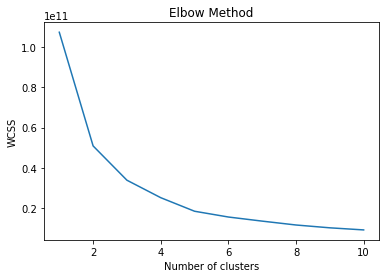

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [29]:
model = KMeans(n_clusters=2)
model.fit(X)

model.labels_


array([1, 1, 0, ..., 0, 0, 0])

In [31]:
sse = model.inertia_
sse = []
for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit(X)
    sse.append(model.inertia_)

https://towardsdatascience.com/k-means-clustering-in-python-4061510145cc